# Вариант 3

Обязательные требования:
1. Все графики должны быть подписаны (заголовок, оси)
2. К каждому графику должны быть представлены выводы (что вы увидели, какие зависимости, какие особенности, что тот или иной график говорит вам о данных).
3. Графики должны быть читабельными (если сделаете такой масштаб, что ничего не будет видно или все будет налазить друг на друга - это не засчитывается).

## Загрузка данных

Вам дан датасет о ценах на жильев с характеристиками этого жилья: `sales_dataset.csv`.

In [2]:
import pandas as pd

file_path = '/sales_dataset.csv'
sales_data = pd.read_csv(file_path)

sales_data.head(), sales_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153430 entries, 0 to 153429
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     153430 non-null  int64  
 1   property_type  153430 non-null  object 
 2   price          153430 non-null  int64  
 3   location       153430 non-null  object 
 4   city           153430 non-null  object 
 5   province_name  153430 non-null  object 
 6   latitude       153430 non-null  float64
 7   longitude      153430 non-null  float64
 8   baths          153430 non-null  int64  
 9   purpose        153430 non-null  object 
 10  bedrooms       153430 non-null  int64  
 11  date_added     153430 non-null  object 
 12  agency         153430 non-null  object 
 13  agent          153430 non-null  object 
 14  Area_in_Marla  153430 non-null  float64
 15  Year           153430 non-null  int64  
 16  Month          153430 non-null  int64  
 17  Day            153430 non-nul

(   Unnamed: 0 property_type     price     location       city  \
 0           0          Flat  10000000         G-10  Islamabad   
 1           1          Flat   6900000         E-11  Islamabad   
 2           2         House  16500000         G-15  Islamabad   
 3           3         House  43500000    Bani Gala  Islamabad   
 4           4         House   7000000  DHA Defence  Islamabad   
 
        province_name   latitude  longitude  baths   purpose  bedrooms  \
 0  Islamabad Capital  33.679890  73.012640      2  For Sale         2   
 1  Islamabad Capital  33.700993  72.971492      3  For Sale         3   
 2  Islamabad Capital  33.631486  72.926559      6  For Sale         5   
 3  Islamabad Capital  33.707573  73.151199      4  For Sale         4   
 4  Islamabad Capital  33.492591  73.301339      3  For Sale         3   
 
    date_added         agency                                         agent  \
 0  2019-02-04           Self                                          Self  

## График 1

Построить точечный график зависимости переменной `Area_in_Marla` от `price` с учётом третей переменной `purpose`.

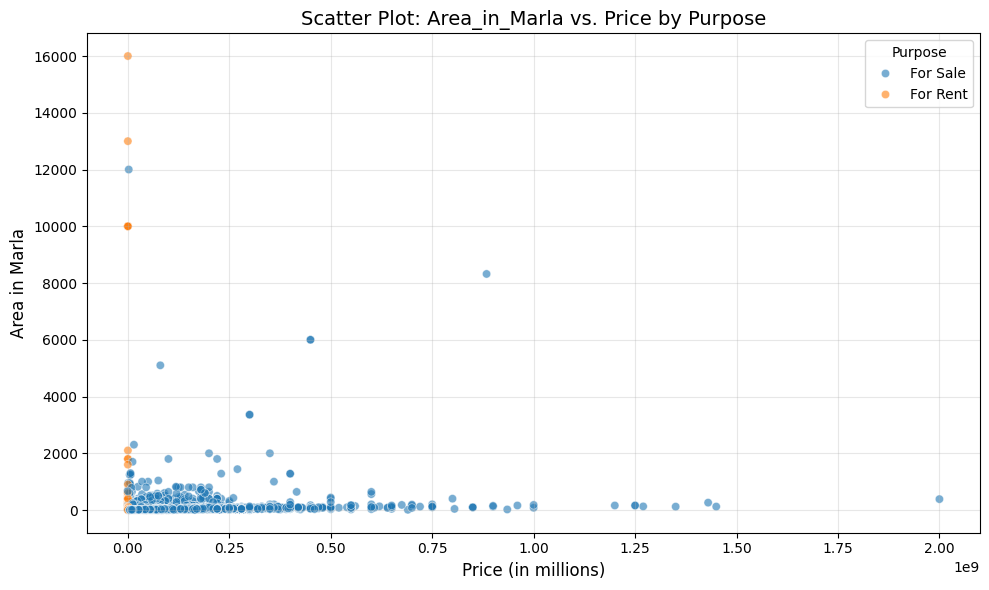

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_data, x="price", y="Area_in_Marla", hue="purpose", alpha=0.6)
plt.title("Scatter Plot: Area_in_Marla vs. Price by Purpose", fontsize=14)
plt.xlabel("Price (in millions)", fontsize=12)
plt.ylabel("Area in Marla", fontsize=12)
plt.legend(title="Purpose", loc="upper right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## График 2

Постройте 4 графика на одной фигуре, как расположить координатные плоскости - это на ваше усмотрение.

Это должны быть гистограммы для следующих переменных:
- `property_type`
- `city`
- `purpose`
- `bedrooms`

Каждый график должен быть своего цвета, также задайте цвет отличный от белого для бекграунда всей фигуры.

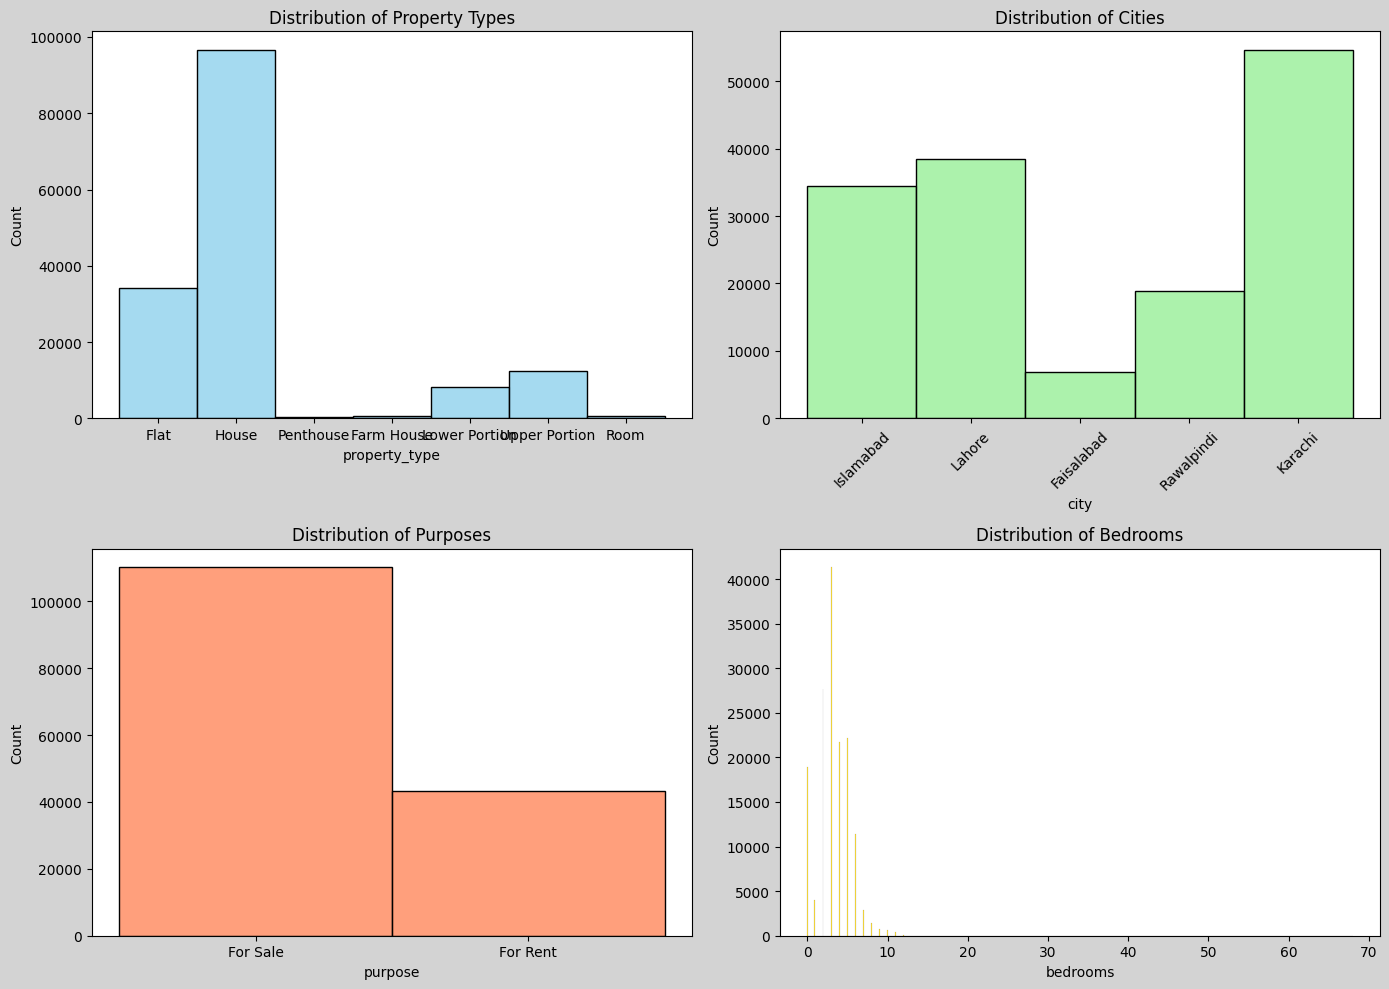

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.patch.set_facecolor('lightgrey')

sns.histplot(sales_data["property_type"], ax=axes[0, 0], color="skyblue", kde=False)
axes[0, 0].set_title("Distribution of Property Types", fontsize=12)

sns.histplot(sales_data["city"], ax=axes[0, 1], color="lightgreen", kde=False)
axes[0, 1].set_title("Distribution of Cities", fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)

sns.histplot(sales_data["purpose"], ax=axes[1, 0], color="coral", kde=False)
axes[1, 0].set_title("Distribution of Purposes", fontsize=12)

sns.histplot(sales_data["bedrooms"], ax=axes[1, 1], color="gold", kde=False)
axes[1, 1].set_title("Distribution of Bedrooms", fontsize=12)

plt.tight_layout()
plt.show()


## График 3

Визуализируйте матрицу корреляции в виде heatmap.

Все должно быть ЧИТАБЕЛЬНО!

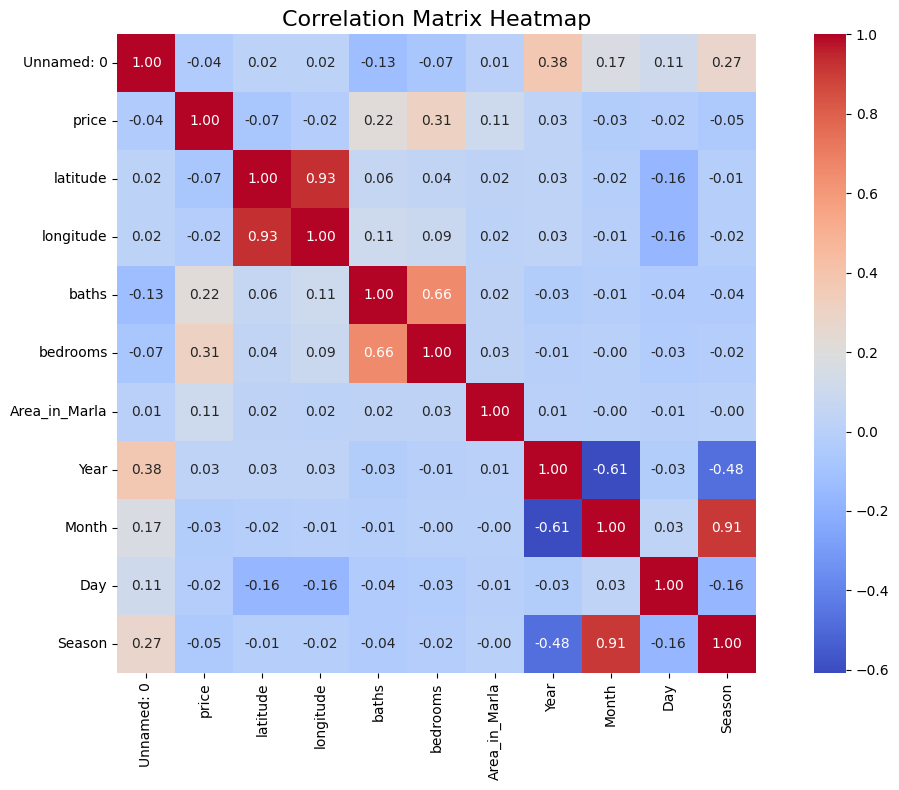

In [9]:
numeric_data = sales_data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.tight_layout()
plt.show()


## График 4

Постройте графики boxplot для следующих переменных:
- `price` с учетом переменной `purpose`
- `bedrooms` с учетом переменной `purpose`

Как их построить решаете самостоятельно.

Проанализируйте выборы.

<ipython-input-6-465a10cbbf66>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales_data, x="purpose", y="price", palette="pastel")
<ipython-input-6-465a10cbbf66>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales_data, x="purpose", y="bedrooms", palette="cool")


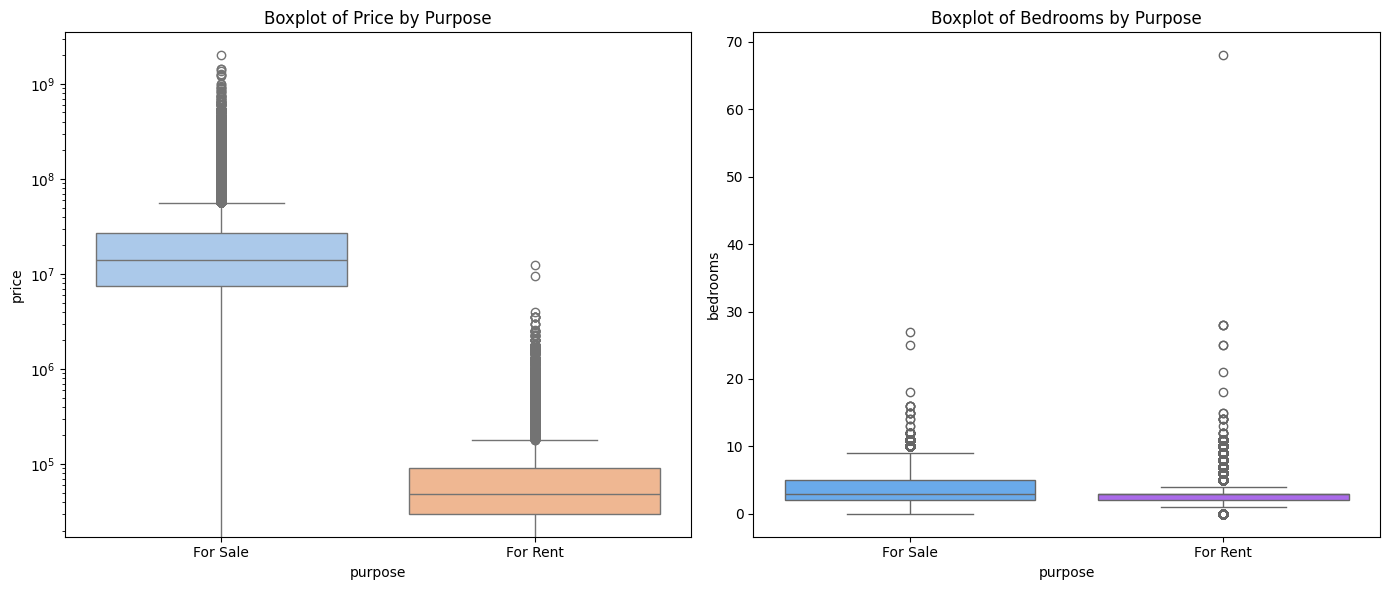

In [6]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=sales_data, x="purpose", y="price", palette="pastel")
plt.title("Boxplot of Price by Purpose", fontsize=12)
plt.yscale('log')

plt.subplot(1, 2, 2)
sns.boxplot(data=sales_data, x="purpose", y="bedrooms", palette="cool")
plt.title("Boxplot of Bedrooms by Purpose", fontsize=12)

plt.tight_layout()
plt.show()

## График 5

Постройте heatmap для отображения пропусков в данных.

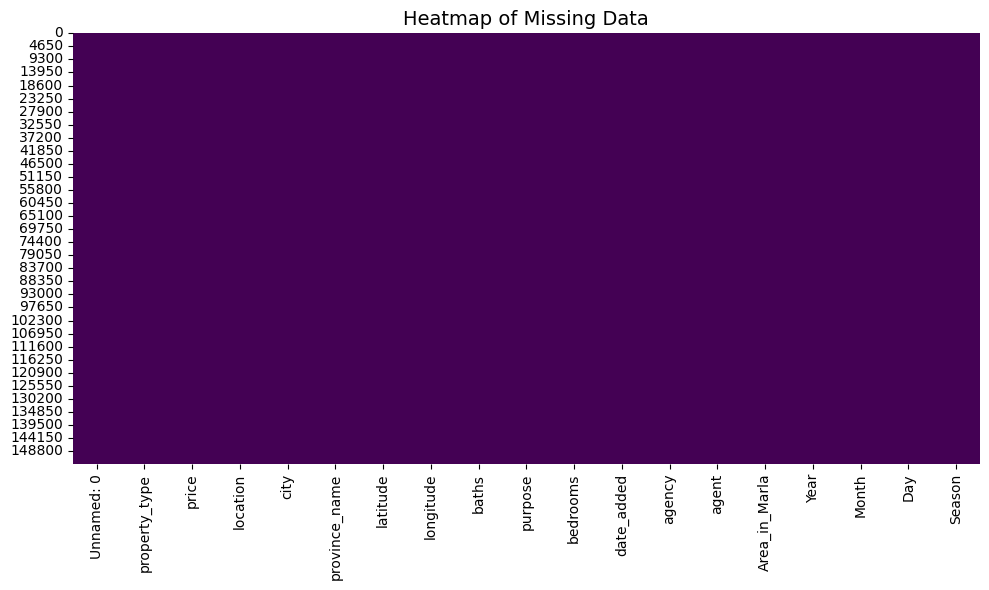

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(sales_data.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Data", fontsize=14)
plt.tight_layout()
plt.show()

## График 6

Постройте график среднего значения переменной `price` в зависимости от переменной `Season`.

<ipython-input-8-79665490e52a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_by_season, x="Season", y="price", palette="muted")


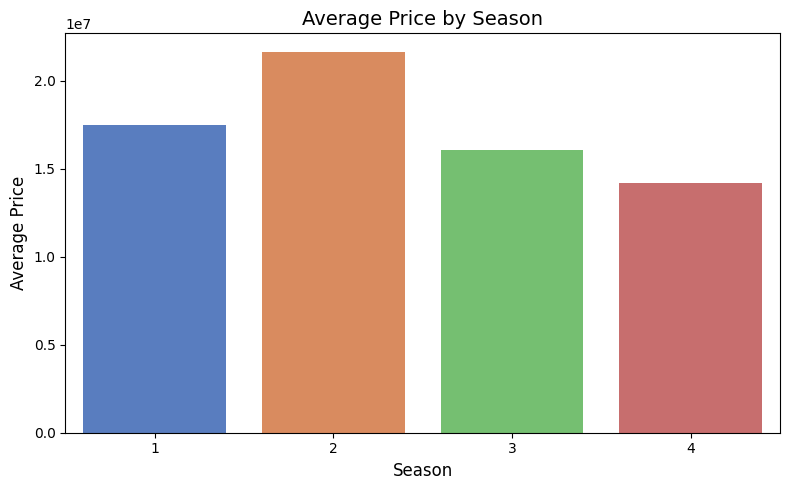

In [8]:
avg_price_by_season = sales_data.groupby("Season")["price"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_price_by_season, x="Season", y="price", palette="muted")
plt.title("Average Price by Season", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.tight_layout()
plt.show()

## График 7

Найдите любой **нестандартный** график и постройте его. На ваш выбор.

In [11]:
# YOUR CODE HERE